In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from scipy.stats import linregress
import matplotlib.patches as mpatches

In [64]:
fp1 = "WHR2015-21.xlsx"
fp3 = "Number without safe drinking water.csv"
fp4 = "water-and-sanitation_percentAccesstoSafeWater.csv"

In [123]:
#read happiness data
whi_df = pd.read_excel(fp1, header = [0])
whi_df.head()

,Country,Score,Rank,Year,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Switzerland,7.587,1,2015,10.857283,0.953136,72.736862,0.947724,0.080692,0.301402
1,Iceland,7.561,2,2015,10.568534,0.975240,72.968559,0.912811,0.257895,0.741834
2,Denmark,7.527,3,2015,10.639521,0.957780,70.323395,0.932365,0.137351,0.200448
3,Norway,7.522,4,2015,11.048872,0.945359,70.705254,0.951669,0.144468,0.388029
4,Canada,7.427,5,2015,10.642016,0.941860,71.443192,0.916792,0.285598,0.444144


In [18]:
whi_df['Year'].value_counts()

2015    158
2016    157
2018    156
2019    156
2017    155
2020    153
2021    149
Name: Year, dtype: int64

In [46]:
#read num without safe drinking water 
wosw_df = pd.read_csv(fp3, header = [1])
wosw_df.head()

,Row Labels,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,(blank),Grand Total
0,Afghanistan,1.850922e+07,1.924345e+07,1.995075e+07,2.071789e+07,2.143656e+07,2.203515e+07,2.249214e+07,2.273901e+07,2.292012e+07,...,2.527644e+07,2.585455e+07,2.636901e+07,2.681000e+07,2.719163e+07,2.752933e+07,2.784696e+07,2.818842e+07,NaN,5.007040e+08
1,Albania,1.591587e+06,1.593606e+06,1.594830e+06,1.593761e+06,1.530163e+06,1.463817e+06,1.394683e+06,1.323311e+06,1.251264e+06,...,9.158596e+05,8.525783e+05,8.500461e+05,8.481330e+05,8.468802e+05,8.459862e+05,8.450913e+05,8.439282e+05,NaN,2.450158e+07
2,Algeria,9.288298e+06,9.233478e+06,9.176867e+06,9.122057e+06,9.072872e+06,9.032255e+06,9.000871e+06,8.978836e+06,8.966463e+06,...,9.058227e+06,9.352666e+06,9.719710e+06,1.011006e+07,1.052321e+07,1.103013e+07,1.156416e+07,1.211102e+07,NaN,2.012948e+08
3,American Samoa,1.281718e+04,1.226391e+04,1.167365e+04,1.103808e+04,1.035162e+04,9.608535e+03,8.819566e+03,8.000112e+03,7.180782e+03,...,3.556527e+03,2.876786e+03,2.191910e+03,1.503452e+03,9.110216e+02,9.084662e+02,9.060256e+02,9.041419e+02,NaN,1.266980e+05
4,Andorra,6.120504e+03,6.303399e+03,6.556491e+03,6.849651e+03,7.136997e+03,7.382328e+03,7.581131e+03,7.739038e+03,7.849293e+03,...,7.560075e+03,7.414336e+03,7.300146e+03,7.234815e+03,7.206920e+03,7.207948e+03,7.220863e+03,7.232001e+03,NaN,1.532604e+05


In [47]:
wosw_df =wosw_df[['Row Labels','2015','2016','2017', '2018', '2019','2020']]
#unpivot the table 
wosw_df = pd.melt(wosw_df, id_vars = 'Row Labels', value_vars = ['2015','2016','2017', '2018', '2019','2020'], var_name = 'Year')
wosw_df= wosw_df.rename(columns = {'Row Labels':'Country'})
wosw_df.head()

,Country,Year,value
0,Afghanistan,2015,2.636901e+07
1,Albania,2015,8.500461e+05
2,Algeria,2015,9.719710e+06
3,American Samoa,2015,2.191910e+03
4,Andorra,2015,7.300146e+03


In [50]:
wosw_df['Year'] = wosw_df['Year'].astype(int)

In [54]:
merged_df = pd.merge(whi_df, wosw_df, on=["Country", "Year"], how="left")

In [56]:
merged_df= merged_df.rename(columns = {'value':'num ppl wo clean h20'})
merged_df.head()
merged_df.dropna(inplace = True)

1084

In [59]:
#divide by million 
merged_df["num ppl wo clean h20"] = merged_df["num ppl wo clean h20"]/1000000

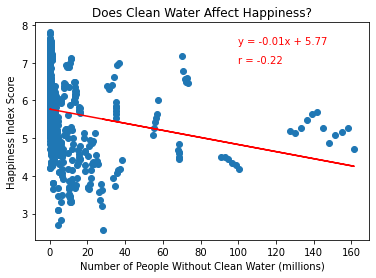

In [63]:
(m, b, r, p, stderr) = linregress(merged_df["num ppl wo clean h20"], merged_df["Score"])
y_regress = m * merged_df["num ppl wo clean h20"] + b

# Make scatter diagram
plt.scatter(merged_df["num ppl wo clean h20"], merged_df["Score"])
plt.xlabel("Number of People Without Clean Water (millions)")
plt.ylabel("Happiness Index Score")
plt.title("Does Clean Water Affect Happiness?")

# Plot line of regression
plt.plot(merged_df["num ppl wo clean h20"], y_regress, color="red")
plt.annotate(f"y = {m:.2f}x + {b:.2f}", color="red", xy=(100, 7.5))
plt.annotate(f"r = {r:.2f}", color="red", xy=(100, 7.0))

# Display plot
plt.show()

## Number of People without Clean Water
* this is a little difficult to understand and explain. Used different measurement methods to identify access to clean water that's not # of people without clean water. 

In [69]:
#read percent access to safe water
pasw_df = pd.read_csv(fp4, header = [0])
pasw_df.head()

,Access to improved drinking water,Access to basic drinking water,Access to limited drinking water,Access to unimproved drinking water,No access to drinking water,Access to safely managed drinking water,Access to improved sanitation,Access to basic sanitation services,Access to limited sanitation services,Access to unimproved sanitation facilities,...,wat_bas_without,wat_sm_without,san_imp_number_without,san_bas_number_without,san_sm_number_without,san_imp_without,san_bas_without,san_sm_without,hyg_bas_number_without,hyg_bas_without
0,31.832053,28.171415,3.660638,43.178306,24.989641,10.927531,27.519330,21.870802,5.648528,46.677563,...,71.828585,89.072469,1.506145e+07,1.623521e+07,NaN,72.480670,78.129198,NaN,NaN,NaN
1,31.860908,28.199366,3.661542,43.167542,24.971550,10.938792,27.540187,21.881304,5.658883,46.679234,...,71.800634,89.061208,1.565639e+07,1.687910e+07,NaN,72.459813,78.118696,NaN,NaN,NaN
2,34.185857,30.236385,3.949472,41.689620,24.124524,11.725373,29.272919,23.274193,5.998726,45.744225,...,69.763615,88.274627,1.598487e+07,1.734063e+07,NaN,70.727081,76.725807,NaN,NaN,NaN
3,36.510876,32.273722,4.237154,40.210931,23.278193,12.512121,31.006929,24.667435,6.339494,44.807082,...,67.726278,87.487879,1.633816e+07,1.783941e+07,NaN,68.993071,75.332565,NaN,NaN,NaN
4,38.853473,34.328559,4.524914,38.724280,22.422247,13.305995,32.755972,26.067695,6.688277,43.866901,...,65.671441,86.694005,1.662722e+07,1.828101e+07,NaN,67.244028,73.932305,NaN,NaN,NaN


In [71]:
#Print columns to see what type of data I have and where the country and year data is labeled as 
for col in pasw_df.columns:
    print(col)

Access to improved drinking water
Access to basic drinking water
Access to limited drinking water
Access to unimproved drinking water
No access to drinking water
Access to safely managed drinking water
Access to improved sanitation
Access to basic sanitation services
Access to limited sanitation services
Access to unimproved sanitation facilities
Open defecation (no sanitation facilities)
Access to safely managed sanitation
Access to basic handwashing facilities
Access to limited handwashing facilities
No handwashing facilities
Number with access to improved drinking water
Number with access to basic drinking water
Number with access to limited drinking water
Number with access to unimproved drinking water
Number with no access to drinking water
Number with access to safely managed drinking water
Number with access to improved sanitation
Number with access to basic sanitation services
Number with access to limited sanitation services
Number with access to unimproved sanitation faciliti

In [79]:
#isolating the columns interested
c = [
    'Entity',
    'Year',
    'Access to improved drinking water', 
    'Access to basic drinking water'
]

pasw_df = pasw_df[c]
#rename to merge table with happiness table 
pasw_df = pasw_df.rename(columns={'Entity':'Country'})
pasw_df.head()


,Country,Year,Access to improved drinking water,Access to basic drinking water,Access to limited drinking water,Access to unimproved drinking water,No access to drinking water,Access to safely managed drinking water,Access to improved sanitation,Access to basic sanitation services,Access to limited sanitation services,Access to unimproved sanitation facilities,Open defecation (no sanitation facilities)
0,Afghanistan,2000,31.832053,28.171415,3.660638,43.178306,24.989641,10.927531,27.519330,21.870802,5.648528,46.677563,25.803107
1,Afghanistan,2001,31.860908,28.199366,3.661542,43.167542,24.971550,10.938792,27.540187,21.881304,5.658883,46.679234,25.780579
2,Afghanistan,2002,34.185857,30.236385,3.949472,41.689620,24.124524,11.725373,29.272919,23.274193,5.998726,45.744225,24.982856
3,Afghanistan,2003,36.510876,32.273722,4.237154,40.210931,23.278193,12.512121,31.006929,24.667435,6.339494,44.807082,24.185989
4,Afghanistan,2004,38.853473,34.328559,4.524914,38.724280,22.422247,13.305995,32.755972,26.067695,6.688277,43.866901,23.377127


In [134]:
merged_df2 = pd.merge(whi_df, pasw_df, on=["Country", "Year"], how="left")
merged_df2.dropna(inplace = True)
merged_df2.head()

,Country,Score,Rank,Year,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,...,Access to basic drinking water,Access to limited drinking water,Access to unimproved drinking water,No access to drinking water,Access to safely managed drinking water,Access to improved sanitation,Access to basic sanitation services,Access to limited sanitation services,Access to unimproved sanitation facilities,Open defecation (no sanitation facilities)
0,Switzerland,7.587,1,2015,10.857283,0.953136,72.736862,0.947724,0.080692,0.301402,...,100.000000,0.0,0.000000,0.0,94.248151,99.995567,99.895445,0.100122,0.004433,0.0
1,Iceland,7.561,2,2015,10.568534,0.975240,72.968559,0.912811,0.257895,0.741834,...,100.000000,0.0,0.000000,0.0,98.943524,100.000000,98.783119,1.216883,0.000000,0.0
2,Denmark,7.527,3,2015,10.639521,0.957780,70.323395,0.932365,0.137351,0.200448,...,99.999998,0.0,0.000002,0.0,96.737212,99.999998,99.597229,0.402769,0.000002,0.0
3,Norway,7.522,4,2015,11.048872,0.945359,70.705254,0.951669,0.144468,0.388029,...,100.000000,0.0,0.000000,0.0,99.018958,100.000000,98.056728,1.943273,0.000000,0.0
4,Canada,7.427,5,2015,10.642016,0.941860,71.443192,0.916792,0.285598,0.444144,...,99.229221,0.0,0.770779,0.0,98.818062,99.255071,99.255071,0.000000,0.744929,0.0


<ipython-input-180-7a4f9bbba65b>:14: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend([a],labels=['line fit for all years'], loc='lower right')


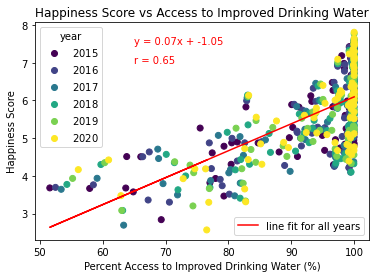

In [180]:
fig, ax = plt.subplots()

(m, b, r, p, stderr) = linregress(merged_df2["Access to improved drinking water"], merged_df2["Score"])
y_regress = m * merged_df2["Access to improved drinking water"] + b
# Plot line of regression
plt.plot(merged_df2["Access to improved drinking water"], y_regress, color="red", label = "line fit for all years")
plt.annotate(f"y = {m:.2f}x + {b:.2f}", color="red", xy=(65, 7.5))
plt.annotate(f"r = {r:.2f}", color="red", xy=(65, 7.0))

#plot scatter 
b = plt.scatter(merged_df2["Access to improved drinking water"], merged_df2["Score"],c=merged_df2['Year'])
legend = plt.legend(*b.legend_elements(), loc ='upper left',title ='year')
ax.add_artist(legend)
plt.legend([a],labels=['line fit for all years'], loc='lower right')

plt.title("Happiness Score vs Access to Improved Drinking Water")
plt.xlabel("Percent Access to Improved Drinking Water (%)")
plt.ylabel("Happiness Score")

plt.savefig("accessToImprovedDrinkingWater.png")
plt.show()


## Access to Improved Drinking Water 
* there seems to be linear relationship with access to drinking water and happiness score. 
* colors also show that more countries may have had increased access to drinking water. 

<ipython-input-179-a621d42848a8>:13: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend([a],labels=['line fit for all years'], loc='lower right')


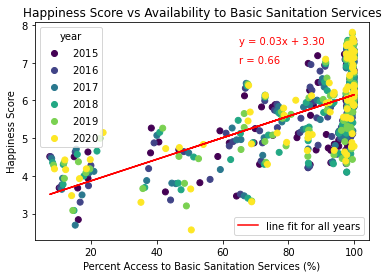

In [179]:
fig, ax = plt.subplots()

(m, b, r, p, stderr) = linregress(merged_df2['Access to basic sanitation services'], merged_df2["Score"])
y_regress = m * merged_df2['Access to basic sanitation services'] + b
# Plot line of regression
a = plt.plot(merged_df2['Access to basic sanitation services'], y_regress, color="red", label = "line fit for all years")
plt.annotate(f"y = {m:.2f}x + {b:.2f}", color="red", xy=(65, 7.5))
plt.annotate(f"r = {r:.2f}", color="red", xy=(65, 7.0))

b = plt.scatter(merged_df2['Access to basic sanitation services'], merged_df2["Score"],c=merged_df2['Year'])
legend = plt.legend(*b.legend_elements(), loc ='upper left',title ='year')
ax.add_artist(legend)
plt.legend([a],labels=['line fit for all years'], loc='lower right')

plt.title("Happiness Score vs Availability to Basic Sanitation Services")
plt.xlabel("Percent Access to Basic Sanitation Services (%)")
plt.ylabel("Happiness Score")
plt.savefig("basicSanitationService.png")
plt.show()


## Access to Basic Sanitation 
* there seems to be a linear relationship with happiness score and % access to basic sanitation services. 

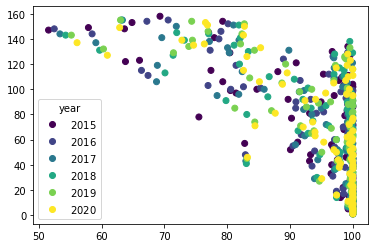

In [137]:
fig, ax = plt.subplots()

b = plt.scatter(merged_df2["Access to improved drinking water"], merged_df2["Rank"],c=merged_df2['Year'])
legend = ax.legend(*b.legend_elements(), loc ='lower left',title ='year')

plt.show()